# Logarithmically Generated Data

Using logs to manage the multiplicative effect of features.
<br>
The equation used to generate outcome here is:
<br>
w_11 * 3 * math.log(__Age__,3) + w_21 * 2 * math.log(__Age__ * __Dependents__ ,2) + w_22 * 3 * math.log(__Age__  * __Annual_Income__,2) + w_31 * 3 * math.log(__Age__ * __Monthly_loans__,2) + w_32 * 3 * math.log(__Age__ * __Income_stability__,2) + w_41 * __Portfolio_status__ + w_51 * 3 * math.log(__Age__ * __Income_stability__ * __Investment_obj__,2) + w_52 * __Duration_inv__ * __Behaviour__ + w_61 * 2 * math.log(__Comfort__ * __Age__,2) + w_62 * __Behaviour__ * __Age__ = output

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df_1 = pd.read_csv("x_11_1_log.csv")
df_02 = pd.read_csv("x_11_02_log.csv")
df_05 = pd.read_csv("x_11_05_log.csv")

In [3]:
log_df =pd.concat([df_1,df_05,df_02])

In [4]:
log_df.head()

,w_11,Age,w_21,Dependents,w_22,Annual_income,w_31,Monthly_loans,w_32,Income_stability,...,Portfolio_status,w_51,Investment_obj,w_52,Duration_inv,w_61,Comfort,w_62,Behaviour,output
0,1,1.0,0.83,1.0,0.83,0.2,0.65,1.0,0.65,0.1,...,0.4,0.8,0.65,0.8,0.5,0.7,1.0,0.65,0.2,-21.31356
1,1,1.0,0.83,1.0,0.83,0.2,0.65,1.0,0.65,0.1,...,0.4,0.8,0.65,0.8,0.5,0.7,1.0,0.65,0.3,-21.20856
2,1,1.0,0.83,1.0,0.83,0.2,0.65,1.0,0.65,0.1,...,0.4,0.8,0.65,0.8,0.5,0.7,1.0,0.65,0.5,-20.99856
3,1,1.0,0.83,1.0,0.83,0.2,0.65,1.0,0.65,0.1,...,0.4,0.8,0.65,0.8,0.5,0.7,1.0,0.65,0.9,-20.57856
4,1,1.0,0.83,1.0,0.83,0.2,0.65,1.0,0.65,0.1,...,0.4,0.8,0.65,0.8,0.5,0.7,1.0,0.65,1.0,-20.47356


In [8]:
log_df =pd.concat([df_1,df_05,df_02])
log_df = log_df[['Age','Dependents','Annual_income','Monthly_loans','Income_stability','Portfolio_status','Investment_obj','Duration_inv','Comfort','Behaviour','output']]

##### General Info about the dataset

Number of rows, description, stats.

In [9]:
log_df.shape

(3750000, 11)

In [10]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750000 entries, 0 to 1249999
Data columns (total 11 columns):
Age                 float64
Dependents          float64
Annual_income       float64
Monthly_loans       float64
Income_stability    float64
Portfolio_status    float64
Investment_obj      float64
Duration_inv        float64
Comfort             float64
Behaviour           float64
output              float64
dtypes: float64(11)
memory usage: 343.3 MB


In [11]:
log_df.describe()

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output
count,3.750000e+06,3.750000e+06,3.750000e+06,3.750000e+06,3.750000e+06,3.750000e+06,3.750000e+06,3750000.00,3.750000e+06,3.750000e+06,3.750000e+06
mean,5.666667e-01,6.250000e-01,6.000000e-01,6.000000e-01,5.000000e-01,5.400000e-01,6.300000e-01,0.65,5.400000e-01,5.800000e-01,-3.039879e+01
std,3.299832e-01,3.344772e-01,2.828428e-01,2.828428e-01,3.391165e-01,1.496663e-01,2.039608e-01,0.10,3.611094e-01,3.187476e-01,1.480519e+01
min,2.000000e-01,1.000000e-01,2.000000e-01,2.000000e-01,1.000000e-01,4.000000e-01,4.000000e-01,0.50,1.000000e-01,2.000000e-01,-6.970124e+01
25%,2.000000e-01,4.750000e-01,4.000000e-01,4.000000e-01,2.500000e-01,4.000000e-01,5.000000e-01,0.60,2.000000e-01,3.000000e-01,-4.254679e+01
50%,5.000000e-01,7.000000e-01,6.000000e-01,6.000000e-01,4.500000e-01,5.000000e-01,6.000000e-01,0.65,5.000000e-01,5.000000e-01,-2.880174e+01
75%,1.000000e+00,8.500000e-01,8.000000e-01,8.000000e-01,7.000000e-01,6.000000e-01,6.500000e-01,0.70,9.000000e-01,9.000000e-01,-1.871553e+01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e-01,1.000000e+00,0.80,1.000000e+00,1.000000e+00,1.690000e+00


In [14]:
for col in log_df:
    print(col,":Unique Elements: ",log_df[col].unique(),",Number of unique elements: ",len(log_df[col].unique()))

Age :Unique Elements:  [1.  0.5 0.2] ,Number of unique elements:  3
Dependents :Unique Elements:  [1.  0.8 0.6 0.1] ,Number of unique elements:  4
Annual_income :Unique Elements:  [0.2 0.4 0.6 0.8 1. ] ,Number of unique elements:  5
Monthly_loans :Unique Elements:  [1.  0.8 0.6 0.4 0.2] ,Number of unique elements:  5
Income_stability :Unique Elements:  [0.1 0.3 0.6 1. ] ,Number of unique elements:  4
Portfolio_status :Unique Elements:  [0.4 0.6 0.5 0.8] ,Number of unique elements:  4
Investment_obj :Unique Elements:  [0.65 0.6  0.4  0.5  1.  ] ,Number of unique elements:  5
Duration_inv :Unique Elements:  [0.5  0.8  0.65 0.6  0.7 ] ,Number of unique elements:  5
Comfort :Unique Elements:  [1.  0.9 0.5 0.2 0.1] ,Number of unique elements:  5
Behaviour :Unique Elements:  [0.2 0.3 0.5 0.9 1. ] ,Number of unique elements:  5
output :Unique Elements:  [-21.31356027 -21.20856027 -20.99856027 ... -45.85762824 -45.58162824
 -45.51262824] ,Number of unique elements:  2693798


In [15]:
log_df.apply(lambda x: len(x.unique()))

Age                       3
Dependents                4
Annual_income             5
Monthly_loans             5
Income_stability          4
Portfolio_status          4
Investment_obj            5
Duration_inv              5
Comfort                   5
Behaviour                 5
output              2693798
dtype: int64

##### Correlations in the dataset.

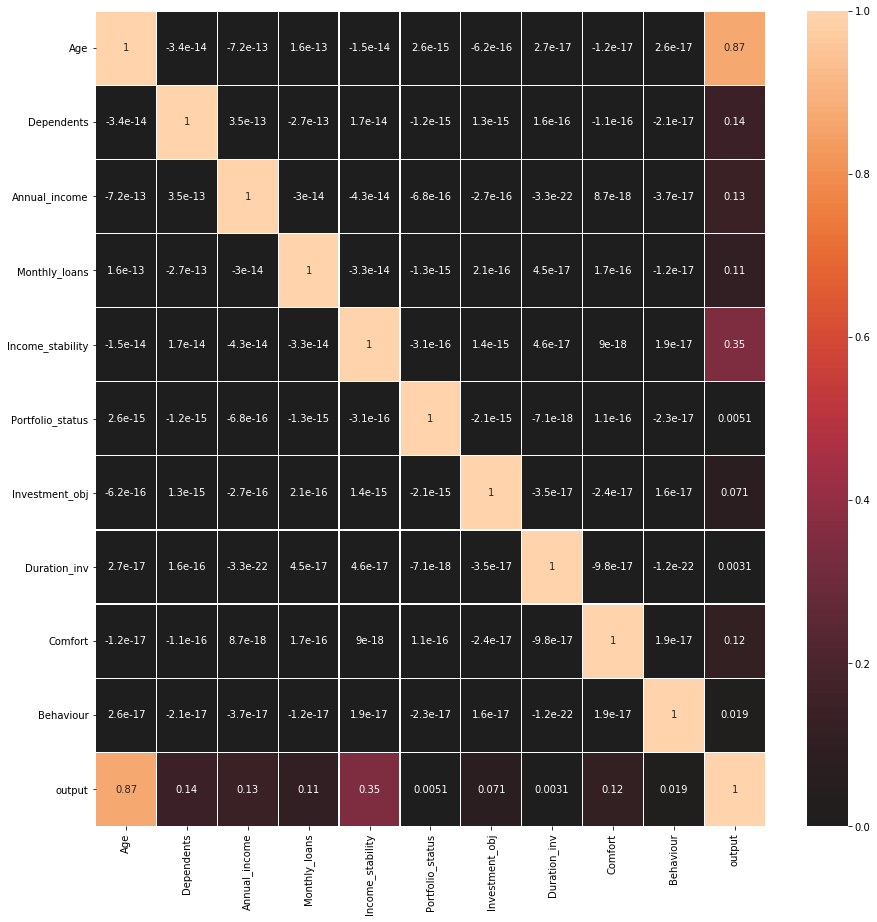

In [16]:
correlation_matrix = log_df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix, center=0, annot=True, linewidths=.3)

In [17]:
correlation_matrix

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output
Age,1.000000e+00,-3.377068e-14,-7.191090e-13,1.631766e-13,-1.524255e-14,2.555101e-15,-6.228774e-16,2.691615e-17,-1.242327e-17,2.638831e-17,0.869218
Dependents,-3.377068e-14,1.000000e+00,3.514393e-13,-2.681363e-13,1.742707e-14,-1.195217e-15,1.271962e-15,1.609923e-16,-1.057057e-16,-2.115260e-17,0.142979
Annual_income,-7.191090e-13,3.514393e-13,1.000000e+00,-2.988641e-14,-4.334088e-14,-6.767617e-16,-2.660533e-16,-3.271026e-22,8.688981e-18,-3.693970e-17,0.134238
Monthly_loans,1.631766e-13,-2.681363e-13,-2.988641e-14,1.000000e+00,-3.284594e-14,-1.326681e-15,2.069151e-16,4.464898e-17,1.739189e-16,-1.231455e-17,0.105126
Income_stability,-1.524255e-14,1.742707e-14,-4.334088e-14,-3.284594e-14,1.000000e+00,-3.136042e-16,1.364246e-15,4.609630e-17,8.993492e-18,1.930942e-17,0.347101
Portfolio_status,2.555101e-15,-1.195217e-15,-6.767617e-16,-1.326681e-15,-3.136042e-16,1.000000e+00,-2.085583e-15,-7.119477e-18,1.064907e-16,-2.327230e-17,0.005055
Investment_obj,-6.228774e-16,1.271962e-15,-2.660533e-16,2.069151e-16,1.364246e-15,-2.085583e-15,1.000000e+00,-3.483931e-17,-2.411819e-17,1.639400e-17,0.070533
Duration_inv,2.691615e-17,1.609923e-16,-3.271026e-22,4.464898e-17,4.609630e-17,-7.119477e-18,-3.483931e-17,1.000000e+00,-9.838346e-17,-1.161026e-22,0.003134
Comfort,-1.242327e-17,-1.057057e-16,8.688981e-18,1.739189e-16,8.993492e-18,1.064907e-16,-2.411819e-17,-9.838346e-17,1.000000e+00,1.929099e-17,0.117126
Behaviour,2.638831e-17,-2.115260e-17,-3.693970e-17,-1.231455e-17,1.930942e-17,-2.327230e-17,1.639400e-17,-1.161026e-22,1.929099e-17,1.000000e+00,0.019125


##### Correlations with the output column

In this dataset multiplicative variables that matter most are Age and Income_stability as per the equation we used to create the dataset.

In [19]:
df_correlations = log_df.corr()
df_correlations['output'].sort_values(ascending=False)

output              1.000000
Age                 0.869218
Income_stability    0.347101
Dependents          0.142979
Annual_income       0.134238
Comfort             0.117126
Monthly_loans       0.105126
Investment_obj      0.070533
Behaviour           0.019125
Portfolio_status    0.005055
Duration_inv        0.003134
Name: output, dtype: float64

##### Minima and maxima of the generated output

In [20]:
print(log_df.output.min(), log_df.output.max())

-69.70124383871394 1.69


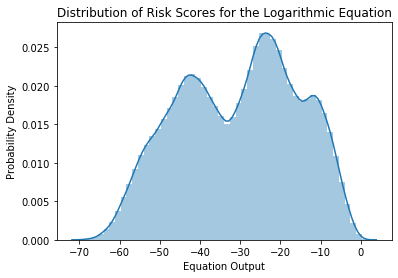

In [21]:
sns.distplot(log_df.output,label="Distribution of Risk Scores")
plt.title("Distribution of Risk Scores for the Logarithmic Equation")
plt.xlabel("Equation Output")
plt.ylabel("Probability Density")
plt.show()

Based on the above distribution the five categories are made using the following boundary conditions:
    <br>
No Risk: output values below -50
<br>
Low Risk: -50 to -40
<br>
Moderate Risk: -40 to -30
<br>
Likes Risk: -30 to -17
<br>
High Risk: -17 above

In [22]:
df=log_df
#Creating a new column with same values as output
df = df.assign(categories = df['output'])
#All observations below 1.5 in output column will get marked as category 1
df.loc[df['output'] <= -50, 'categories'] = 1
#Observations from 1.5 to 2.5 marked as category 2
df.loc[(df['output'] > -50) & (df['output'] <= -40) , 'categories'] = 2
#Observations from 2.5 to 3.5 marked as category 3
df.loc[(df['output'] > -40) & (df['output'] <= -30) , 'categories'] = 3
#Observations from 3.5 to 4.5 marked as category 4
df.loc[(df['output'] > -30) & (df['output'] <= -17) , 'categories'] = 4
#Observations above 4.5 marked as category 5
df.loc[df['output']>-17, 'categories'] = 5

##### Distribution after category division

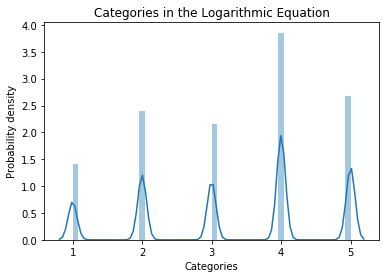

In [23]:
sns.distplot(df.categories)
plt.title("Categories in the Logarithmic Equation")
plt.xlabel("Categories")
plt.ylabel("Probability density")
plt.show()

Number of datapoints in each category.

In [24]:
df.categories.value_counts()

4.0    1156591
5.0     804616
2.0     717505
3.0     648429
1.0     422859
Name: categories, dtype: int64

#### Stratified Sampling

A balanced sample is given to the regulator. The sample gives a small but complete representation of the dataset.


In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3,test_size=0.3,random_state=42)
# n_splits= number of shuffles and iterations

#loop to stratify by category and store in train and test set
for train_index,test_index in split.split(df,df['categories']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

Here 30% of the dataset is taken finally. Both the datasets are similar as they exibhit similar correlations and variations and similar correlations with the output columns. This helps prove taking a small part of the dataset can be an adequately accurate represenatation.

In [26]:
strat_test_set.head()

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output,categories
1237022,1.0,0.1,1.0,0.4,1.0,0.8,0.60,0.50,0.1,0.5,-13.586577,5.0
23782,1.0,1.0,0.2,0.8,1.0,0.4,0.65,0.80,0.9,0.5,-7.268737,5.0
499066,0.2,0.8,0.6,0.2,1.0,0.4,0.40,0.65,0.2,0.3,-44.835300,2.0
610386,0.2,0.8,1.0,0.4,1.0,0.6,0.50,0.50,0.5,0.3,-38.362929,3.0
1102312,1.0,0.1,0.6,0.4,0.1,0.4,0.50,0.65,0.5,0.5,-27.392592,4.0


##### Variations of the division are similar

Bigger Set

In [27]:
strat_train_set.var()

Age                   0.108898
Dependents            0.111849
Annual_income         0.080014
Monthly_loans         0.079954
Income_stability      0.114931
Portfolio_status      0.022398
Investment_obj        0.041610
Duration_inv          0.009997
Comfort               0.130353
Behaviour             0.101620
output              219.202698
categories            1.706222
dtype: float64

Smaller Set

In [28]:
strat_test_set.var()

Age                   0.108868
Dependents            0.111936
Annual_income         0.079966
Monthly_loans         0.080107
Income_stability      0.115162
Portfolio_status      0.022404
Investment_obj        0.041577
Duration_inv          0.010007
Comfort               0.130509
Behaviour             0.101553
output              219.172513
categories            1.706224
dtype: float64

Shape of bigger and smaller set

In [30]:
print( strat_train_set.shape,strat_test_set.shape)

(2625000, 12) (1125000, 12)


Correlations with the output in final set

In [31]:
strat_test = strat_test_set.corr()
strat_test['output'].sort_values(ascending=False)

output              1.000000
categories          0.971413
Age                 0.869074
Income_stability    0.346537
Dependents          0.143074
Annual_income       0.134884
Comfort             0.116803
Monthly_loans       0.106682
Investment_obj      0.070134
Behaviour           0.019489
Duration_inv        0.005241
Portfolio_status    0.004668
Name: output, dtype: float64

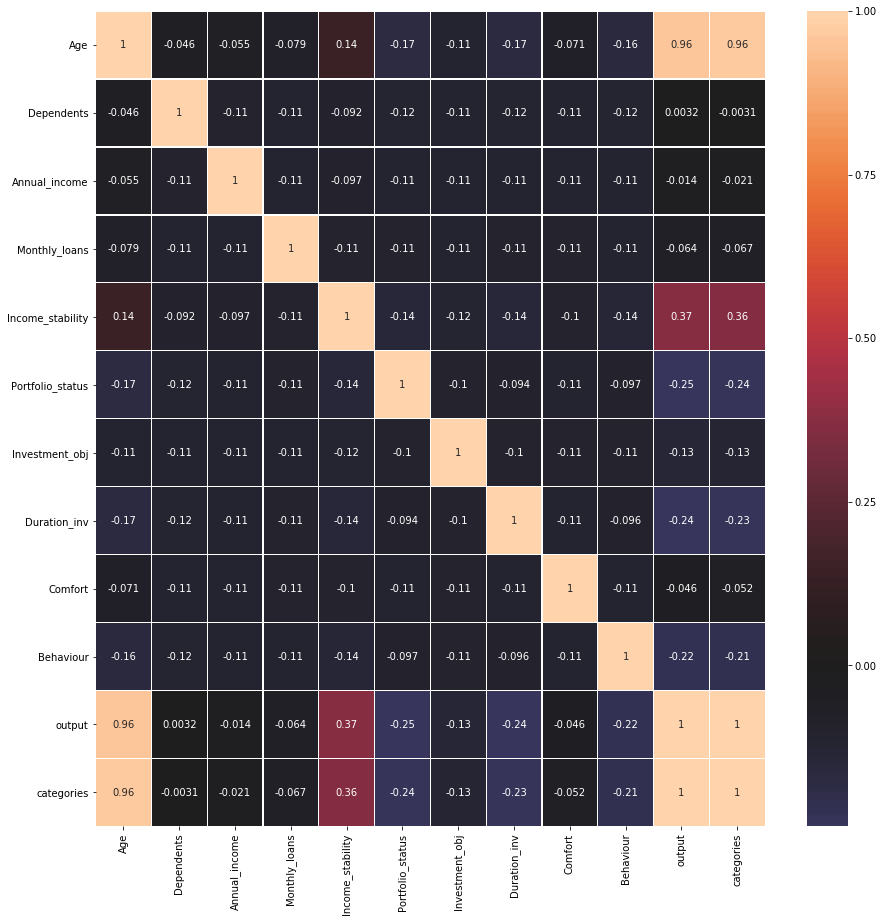

In [32]:
correlation_matrix_strat = strat_test.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix_strat, center=0, annot=True, linewidths=.3)

Output file

In [33]:
#strat_test_set.to_csv("log_stratified_sample_2dec2019.csv")

Number of elements in each category

In [34]:
strat_test_set.categories.value_counts()

4.0    346977
5.0    241385
2.0    215251
3.0    194529
1.0    126858
Name: categories, dtype: int64